# Basic statistics for the data descriptor 'A living catalogue of artificial intelligence datasets and benchmarks for medical decision making'

This notebook includes basic statistics of the dataset *'A living catalogue of artificial intelligence datasets and benchmarks for medical decision making'* (Version 0.1.3, see http://doi.org/10.5281/zenodo.4668570 for more information on the dataset.)

In [81]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
from matplotlib.ticker import ScalarFormatter

plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle")
plt.rcParams.update({'font.size': 15})

In [82]:
DATA = 'data/annotated-datasets.tsv'

In [83]:
df = pd.read_csv(DATA, sep='\t',  lineterminator='\n')
df.head()

,Name (or description if no name available),Task,Mapped task,Id(s) of mapped task,Data basis,Has evaluation criteria?,Metrics,Data splits,Accessibility,Data license,...,Clinical relevance,Primary target group of task,Link: Source publication(s),Link: Main reference,Link: Dataset,First time published,Language,Comment,Normalised task,Aliases\r
0,Dataset based on Chinese Coronary Artery Disea...,Clinical registry data verification,Data verification,NaN,Disease registry data,Yes,"Accuracy, Recall, Time consumption",Described,Unknown,NaN,...,Directly,NaN,https://pubmed.ncbi.nlm.nih.gov/30777618,NaN,NaN,NaN,Chinese,NaN,NaN,\r
1,Dataset of 1569 patients with PAD and controls...,Automatic ascertainment of PAD cases from clin...,Disease Prediction,https://identifiers.org/ito:ITO_00379,Clinical notes / EHR data,Yes,"Sensitivity, Specificity, PPV, NPV, Accuracy",Described,Unknown,NaN,...,Directly,Clinicians,https://pubmed.ncbi.nlm.nih.gov/28189359,NaN,NaN,NaN,English,NaN,NaN,\r
2,Dataset based on Cerner Health Facts®,Disease prediction,Disease prediction,NaN,Clinical notes / EHR data,Yes,AUC-ROC,Described,Unknown,NaN,...,Directly,NaN,https://arxiv.org/ftp/arxiv/papers/2005/2005.1...,https://arxiv.org/ftp/arxiv/papers/2005/2005.1...,NaN,NaN,English,NaN,NaN,\r
3,Dataset based on Truven Health MarketScan®,Disease prediction,Disease prediction,NaN,Claims data,Yes,AUC,Described,Unknown,NaN,...,Directly,NaN,https://arxiv.org/ftp/arxiv/papers/2005/2005.1...,https://arxiv.org/ftp/arxiv/papers/2005/2005.1...,NaN,NaN,English,NaN,NaN,\r
4,Dataset based on OncoSHARE database,Prediction of the timing of distant metastatic...,Event prediction,NaN,Clinical notes / EHR data,Yes,"Classwise Sensitivity, Specificity, F1 Score, ...",Described,Unknown,NaN,...,Directly,NaN,https://pubmed.ncbi.nlm.nih.gov/31584836,NaN,NaN,NaN,English,NaN,NaN,\r


## Summary statistics for all identified datasets

In [84]:
# Filter out datasets not relevant to NLP
df = df[df['Relevant for NLP?'] == 'Yes'] 

In [85]:
number_of_identified_datasets = df.shape[0]
print(number_of_identified_datasets)

450


### How many of the identified datasets have evaluation criteria?

Text(0.5, 0, 'Percent of datasets')

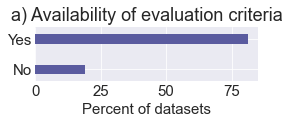

In [86]:
# Availability of evaluation criteria
evaluation_criteria = pd.get_dummies(df['Has evaluation criteria?']).sum()/number_of_identified_datasets*100
plt = evaluation_criteria.plot.barh(width=0.3, figsize=(4,1), title='a) Availability of evaluation criteria')
plt.set_xlabel('Percent of datasets')

### Accessibility

Not available         5.333333
On request           13.111111
Public               28.222222
Public (planned)      0.222222
Unknown              43.555556
Upon registration     9.555556
dtype: float64


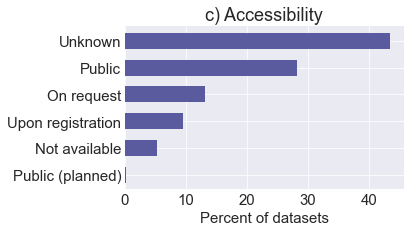

In [87]:
# Accessibility
accessibility = pd.get_dummies(df['Accessibility']).sum()/number_of_identified_datasets*100
print(accessibility)
plt = accessibility.sort_values().plot.barh(width=0.6, figsize=(5,3), title='c) Accessibility')
plt.set_xlabel('Percent of datasets')
plt.figure.savefig('plots/accessibility.jpg', dpi=300, bbox_inches='tight')

In [88]:
benchmark_df_filtered_for_criteria = df[df['Has evaluation criteria?']!='No']
benchmark_df_filtered_for_accessibility = benchmark_df_filtered_for_criteria[benchmark_df_filtered_for_criteria['Accessibility']!='Unknown']
benchmark_df_filtered_for_accessibility = benchmark_df_filtered_for_accessibility[benchmark_df_filtered_for_criteria['Accessibility']!='Not available']

C:\Users\kathrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


### Source data type

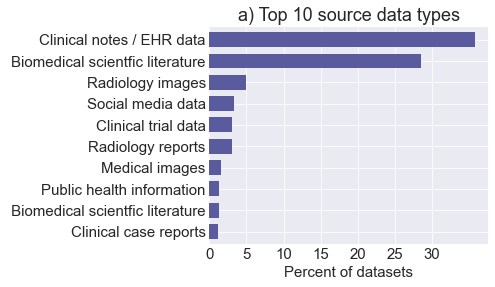

In [89]:
df = df.assign(data_basis=df['Data basis'].str.split(';')).explode('data_basis')
source_data = pd.get_dummies(df['data_basis']).sum()
#print(source_data)

source_data = source_data.sort_values()[-10:]/number_of_identified_datasets*100
plt = source_data.plot.barh(width=0.7, figsize=(5,4), title='a) Top 10 source data types')
plt.set_xlabel('Percent of datasets')
plt.set_xticks(range(0, 35, 5))
plt.figure.savefig('plots/source_data.jpg', dpi=300, bbox_inches='tight')


### Availability of data splits

<AxesSubplot:title={'center':'Availability of data splits'}>

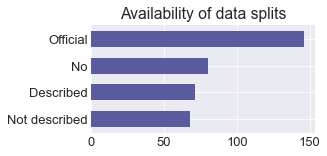

In [66]:
data_splits = pd.get_dummies(benchmark_df_filtered_for_criteria['Data splits']).sum()
data_splits.sort_values().plot.barh(width=0.6, figsize=(4,2), title='Availability of data splits')

### Tasks

In [90]:
# Filter out datasets where no concrete task could be extracted
df = df[df['Task'] != 'Not applicable']
df = df[df['Mapped task'] != 'Not applicable']
number_of_datasets_with_tasks = df.shape[0]

In [91]:
tasks = pd.get_dummies(df['Task']).sum()
tasks.sort_values(ascending=False)

Information extraction                                                                                                   17
Named entity recognition                                                                                                 14
Biomedical Semantic Indexing                                                                                             11
Biomedical event extraction                                                                                               9
Biomedical Semantic QA                                                                                                    9
                                                                                                                         ..
Importance ranking of EHR notes                                                                                           1
Image retreival                                                                                                           1
Image cl

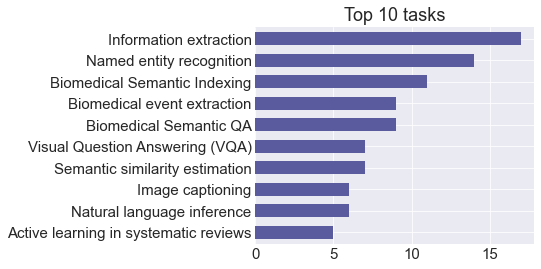

In [92]:
tasks = pd.get_dummies(df['Task']).sum()
plt = tasks.sort_values(ascending=True).tail(10).plot.barh(width=0.6, figsize=(5,4), title='Top 10 tasks')

### Mapped tasks

 Image Classification        0.239234
 Image Retrieval             0.239234
 Image classification        0.717703
 Information Retrieval       0.717703
 Lexical Normalization       0.239234
                               ...   
Text embedding               1.913876
Text mapping                 0.239234
Topic modeling               0.239234
Visual question answering    5.502392
Word Sense Disambiguation    0.239234
Length: 61, dtype: float64


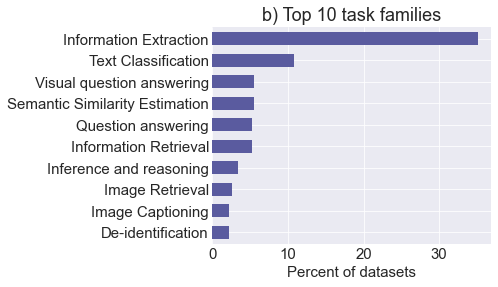

In [93]:
df = df.assign(mapped_task=df['Mapped task'].str.split(';')).explode('mapped_task')
#mapped_tasks = mapped_tasks.melt().dropna()
mapped_tasks = pd.get_dummies(df['mapped_task']).sum()/number_of_datasets_with_tasks*100
print(mapped_tasks)
plt = mapped_tasks.sort_values(ascending=True).tail(10).plot.barh(width=0.6, figsize=(5,4), title='b) Top 10 task families')
plt.set_xlabel('Percent of datasets')
plt.figure.savefig('plots/all_datasets_tasks.jpg', dpi=300, bbox_inches='tight')